# Sistema de predicción de ventas
    Queremos establecer el almacén de nuestra empresa en otra localización y necesitamos estimar el ritmo de la ventas, que desde la creación de la empresa ha ido en aumento, para los próximos meses, a fin de proveer el espacio que necesitaremos.

#### Tratamiento de datos:

* Importación de librerias.
* Importación de dataset.
* Verificación y limpieza.



In [171]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from pickle import dump

In [172]:
data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    366 non-null    object 
 1   sales   366 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [173]:
data['date'] = pd.to_datetime(data.date)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    366 non-null    datetime64[ns]
 1   sales   366 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


In [174]:
#Hacemos que la columna de Date, se convierta en el indice, y luego le agregamos la columna de Sales, asi podemos manejar por dia como indice.
data = data.set_index('date')
data_fn = data['sales']
data_fn.head(2)

date
2022-09-03 17:10:08.079328    55.292157
2022-09-04 17:10:08.079328    53.803211
Name: sales, dtype: float64

In [175]:
data_fn.shape

(366,)

In [176]:
data_fn.duplicated().sum()

0

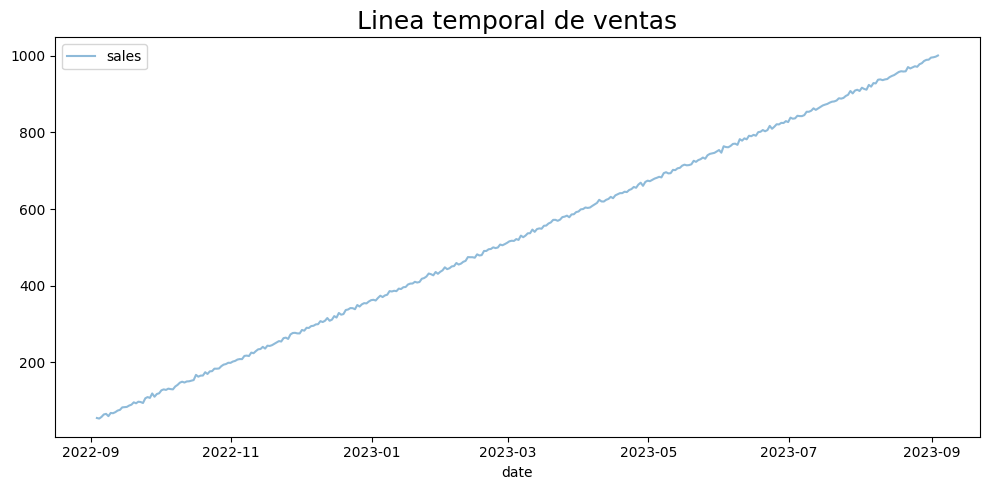

In [177]:
fig, axis =plt.subplots(figsize=(10,5))

sns.lineplot(data= data, alpha=0.5)

plt.title("Linea temporal de ventas", size=18)
plt.tight_layout()
plt.show()

## Autocorrelación

<function matplotlib.pyplot.show(close=None, block=None)>

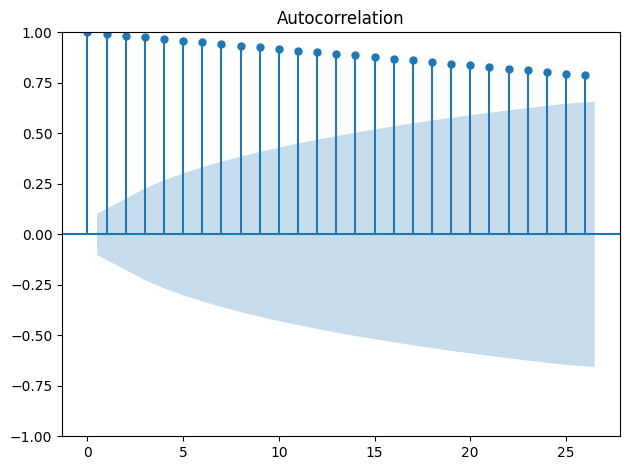

In [178]:
plot_acf (data_fn)
plt.tight_layout()
plt.show

In [179]:
# Extraer la serie temporal de sales
ts_sales = data_fn

# Aplicar la prueba de Dickey-Fuller
result = adfuller(ts_sales)

# Imprimir los resultados
print('Estadística de la prueba Dickey-Fuller:', result[0])
print('Valor p:', result[1])
print('Valores críticos:', result[4])

# Comparar el valor p con un umbral (por ejemplo, 0.05) para tomar una decisión
if result[1] <= 0.05:
    print("Rechazamos la hipótesis nula. La serie temporal de sales es estacionaria.")
else:
    print("No podemos rechazar la hipótesis nula. La serie temporal de ventas podría no ser estacionaria.")


Estadística de la prueba Dickey-Fuller: 0.5454141937063742
Valor p: 0.9861899815311063
Valores críticos: {'1%': -3.4490648539347544, '5%': -2.8697861692116478, '10%': -2.5711631253228306}
No podemos rechazar la hipótesis nula. La serie temporal de ventas podría no ser estacionaria.


### Informe sobre la Prueba de Dickey-Fuller para la Serie Temporal de Ventas:

Hemos realizado la prueba de Dickey-Fuller para evaluar la estacionariedad de la serie temporal de ventas. A continuación, se presentan las conclusiones basadas en los resultados obtenidos:

Estadística de la Prueba Dickey-Fuller:

La estadística de la prueba Dickey-Fuller es 0.5454141937063742. Este valor indica cuánto se ha movido la serie temporal después de intentar "empujarla hacia la estacionariedad". En este caso, el valor no es muy grande, lo cual sugiere que hay cierta estabilidad en los datos.
Valor p:

El valor p asociado a la prueba es 0.9861899815311063. Este valor es relativamente alto, lo cual implica que no tenemos suficiente evidencia para rechazar la hipótesis nula de que la serie no es estacionaria. Un valor p más bajo, generalmente por debajo de 0.05, habría indicado una mayor confianza en la estacionariedad de la serie.


Valores Críticos:

Los valores críticos para los niveles del 1%, 5%, y 10% son -3.4490648539347544, -2.8697861692116478 y -2.5711631253228306, respectivamente. La estadística de la prueba no es menor que estos valores críticos en ninguno de los niveles.


Conclusión:

Basándonos en los resultados de la prueba de Dickey-Fuller, no encontramos suficiente evidencia para afirmar que la serie temporal de ventas es estacionaria. El valor p alto y la estadística de la prueba que no es significativamente menor que los valores críticos sugieren que puede haber algún patrón o tendencia en los datos que hace que la serie no sea estacionaria.


## Análisis de una serie temporal

* Tensor: La estructura de la linea de tiempo esta representada de la siguiente manera: 


    - Número de Muestras (Samples): 366, ya que tienes datos para 366 días.
    - Pasos de Tiempo (Time Steps): 1, ya que estás registrando datos diarios.
    - Características (Features): 1, solo se esta registrando la variable Ventas (sales).

- Tendencia: Se aprecia una tendencia ascendente, lo cual indica un crecimiento de la empresa en el transcurso del tiempo.

* Estacionalidad: No se observa estacionalidad en los datos, lo que indica un crecimiento sin importar los meses del año.

* Variabilidad: La variabilidad observada es muy baja, lo que confirma que el crecimiento en ventas aumenta con el tiempo sin importar las etapas de tiempo.

* Autocorrelación: Podemos obsevar que tiene una autocorrelación alta.


### Entrenamiento del modelo ARIMA.

In [180]:
df_train, df_test = data_fn.iloc[:-183], data_fn.iloc[-183:]

In [181]:
from pmdarima import auto_arima

modelo = auto_arima(df_train, seasonal = False, trace = True)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1042.376, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=988.332, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=925.761, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1098.123, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=927.424, Time=0.13 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=927.414, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=929.412, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1098.912, Time=0.02 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 0.934 seconds


In [182]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  183
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -459.881
Date:                Fri, 24 Nov 2023   AIC                            925.761
Time:                        00:55:25   BIC                            935.373
Sample:                    09-03-2022   HQIC                           929.658
                         - 03-04-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.5883      0.017    148.906      0.000       2.554       2.622
ma.L1         -0.9294      0.029    -32.255      0.000      -0.986      -0.873
sigma2         9.0684      1.065      8.515      0.000       6.981      11.156
===================================================================================
Ljung-Box (L1) (Q):                   0.29   Jarque-Bera (JB):                 1.38
Prob(Q):                              0.59   Prob(JB):                         0.50
Heteroskedasticity (H):               0.83   Skew:                             0.10
Prob(H) (two-sided):                  0.47   Kurtosis:                         2.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [183]:
forecast = modelo.predict(20)
forecast.head(1)

2023-03-05 17:10:08.079328    525.427057
Freq: D, dtype: float64

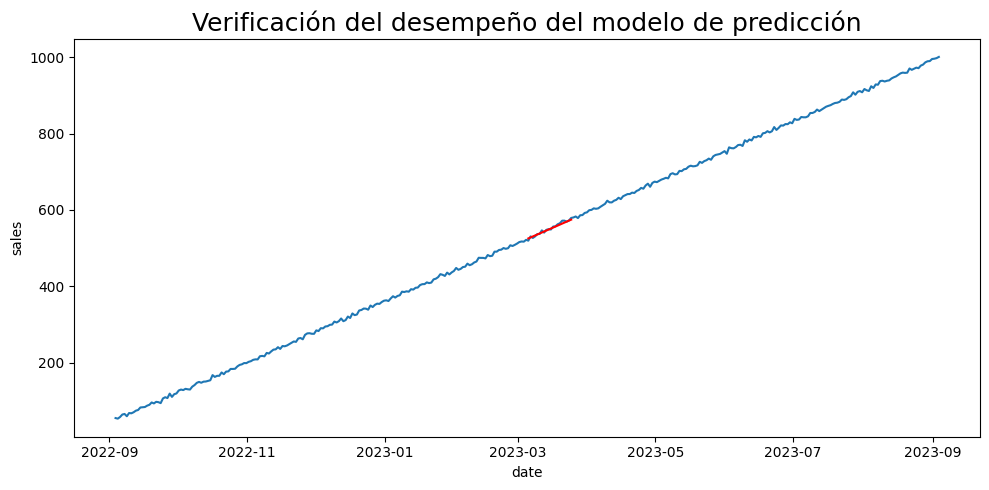

In [184]:
fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = data_fn)
sns.lineplot(data = forecast, c = "red")
plt.title("Verificación del desempeño del modelo de predicción", size= 18)
plt.tight_layout()
plt.show()

In [185]:
dump(modelo, open("/workspaces/Series_temporal_alt/models/modelo.sav", "wb"))

In [186]:
data_fn.to_csv("/workspaces/Series_temporal_alt/data/processed/Data_Limpia.csv")